In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import classification_report

In [2]:
path =r"C:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_Hajer\data\creditcard.csv"
df = pd.read_csv(path)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# **1: Exploratory Data Analysis (EDA)** 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.shape

(284807, 31)

In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# **Check for outliers and distributions**

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print("Number of outliers in Amount:", outliers.shape[0])

Number of outliers in Amount: 31904


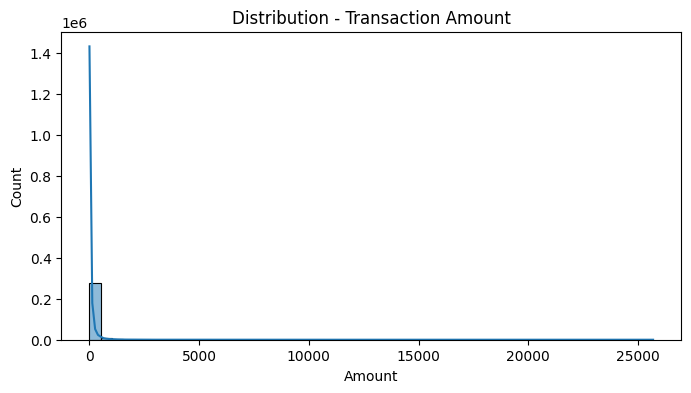

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution - Transaction Amount")
plt.show()

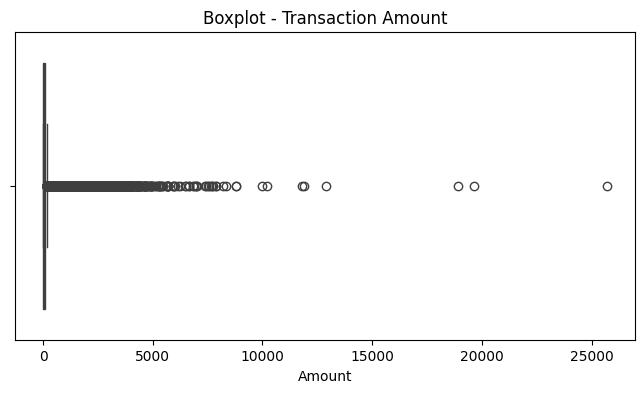

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Amount'])
plt.title("Boxplot - Transaction Amount")
plt.show()

# **Class imbalance check**

In [13]:
class_counts = df['Class'].value_counts()
print("\nClass distribution:\n", class_counts)


Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\bbuser\AppData\Local\Temp\ipykernel_15756\3059628129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


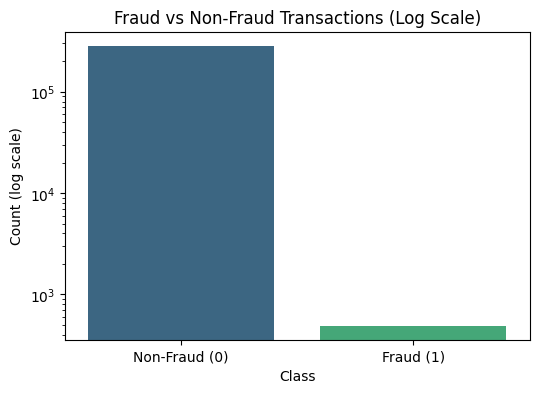

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.yscale("log")   # <-- log scale
plt.title("Fraud vs Non-Fraud Transactions (Log Scale)")
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel("Count (log scale)")
plt.show()

# **Correlation and feature analysis**

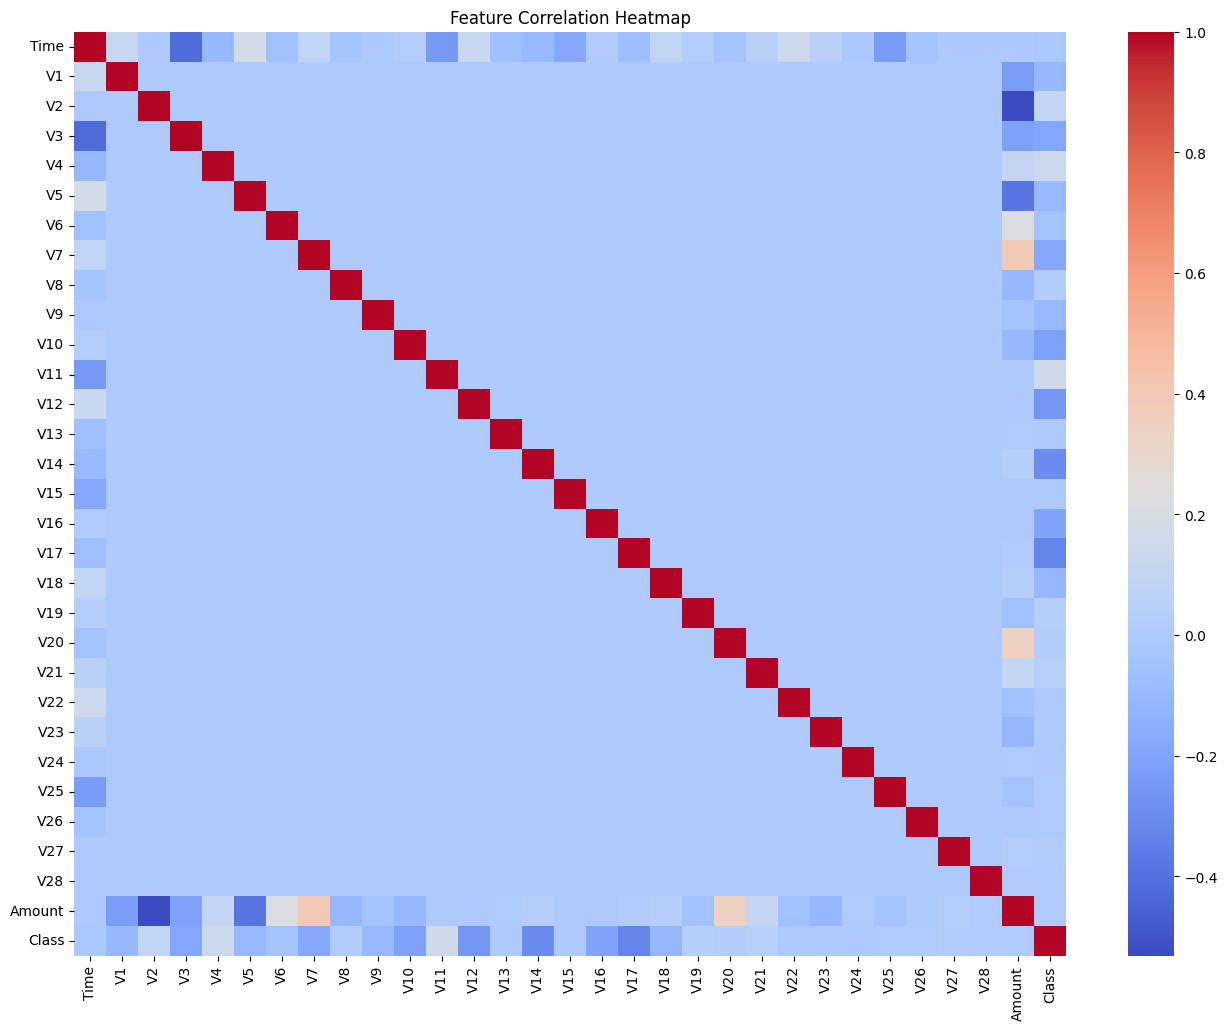

In [15]:
plt.figure(figsize=(16,12))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

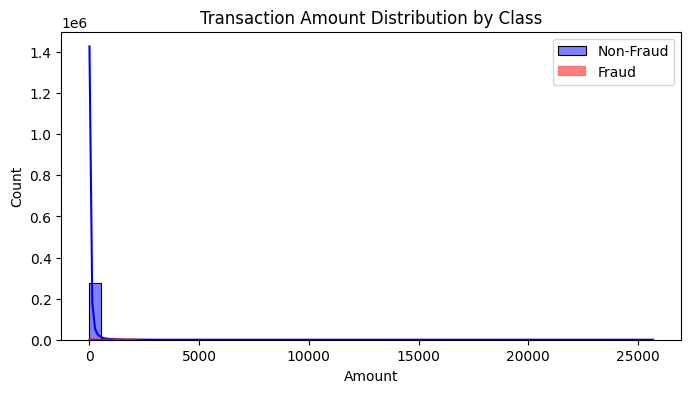

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['Class']==0]['Amount'], bins=50, color='blue', label='Non-Fraud', kde=True)
sns.histplot(df[df['Class']==1]['Amount'], bins=50, color='red', label='Fraud', kde=True)
plt.legend()
plt.title("Transaction Amount Distribution by Class")
plt.show()

# **2: Data Preprocessing**

# **Check for duplicated**

In [17]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [18]:
df.duplicated().sum()

np.int64(1081)

In [19]:
duplicates = df[df.duplicated()]
duplicates

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [20]:
df = df.drop_duplicates()

In [21]:
df.duplicated().sum()

np.int64(0)

# **Check for null values**

In [22]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

In [24]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Use stratified split to maintain class imbalance ratio
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [26]:
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("Fraud ratio in training set: {:.4f}".format(y_train.mean()))
print("Fraud ratio in test set: {:.4f}".format(y_test.mean()))

Train set shape: (226980, 30) (226980,)
Test set shape: (56746, 30) (56746,)
Fraud ratio in training set: 0.0017
Fraud ratio in test set: 0.0017


# **3: Baseline Models**

In [27]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    print(f"\n===== {name} =====")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    
    if y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)
        print("ROC-AUC Score:", round(auc, 4))
    else:
        print("ROC-AUC Score: Not available (model has no predict_proba)")
    
    return {
        "Model": name,
        "Precision": precision_recall_fscore_support(y_test, y_pred, average="binary")[0],
        "Recall": precision_recall_fscore_support(y_test, y_pred, average="binary")[1],
        "F1-Score": precision_recall_fscore_support(y_test, y_pred, average="binary")[2],
        "ROC-AUC": auc if y_prob is not None else np.nan
    }

In [28]:
# Train Models
results = []

# Logistic Regression
lr = LogisticRegression(max_iter=1000, class_weight=None, random_state=42)
lr.fit(X_train, y_train)
results.append(evaluate_model("Logistic Regression", lr, X_test, y_test))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
results.append(evaluate_model("Decision Tree", dt, X_test, y_test))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
results.append(evaluate_model("Random Forest", rf, X_test, y_test))

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
results.append(evaluate_model("XGBoost", xgb, X_test, y_test))

# Support Vector Machine (SVM)
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
results.append(evaluate_model("SVM", svm, X_test, y_test))


===== Logistic Regression =====
Confusion Matrix:
[[56641    10]
 [   39    56]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     56651
           1     0.8485    0.5895    0.6957        95

    accuracy                         0.9991     56746
   macro avg     0.9239    0.7946    0.8476     56746
weighted avg     0.9991    0.9991    0.9991     56746

ROC-AUC Score: 0.9549

===== Decision Tree =====
Confusion Matrix:
[[56625    26]
 [   28    67]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9995    0.9995     56651
           1     0.7204    0.7053    0.7128        95

    accuracy                         0.9990     56746
   macro avg     0.8600    0.8524    0.8561     56746
weighted avg     0.9990    0.9990    0.9990     56746

ROC-AUC Score: 0.8524

===== Random Forest =====
Confusion Matrix:
[[56649     2]
 [   26    69]]

Classification Repo

C:\Users\bbuser\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:01:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== XGBoost =====
Confusion Matrix:
[[56635    16]
 [   26    69]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9997    0.9996     56651
           1     0.8118    0.7263    0.7667        95

    accuracy                         0.9993     56746
   macro avg     0.9057    0.8630    0.8831     56746
weighted avg     0.9992    0.9993    0.9992     56746

ROC-AUC Score: 0.934

===== SVM =====
Confusion Matrix:
[[56650     1]
 [   40    55]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9993    1.0000    0.9996     56651
           1     0.9821    0.5789    0.7285        95

    accuracy                         0.9993     56746
   macro avg     0.9907    0.7895    0.8641     56746
weighted avg     0.9993    0.9993    0.9992     56746

ROC-AUC Score: 0.9209


# **4: Model Evaluation**

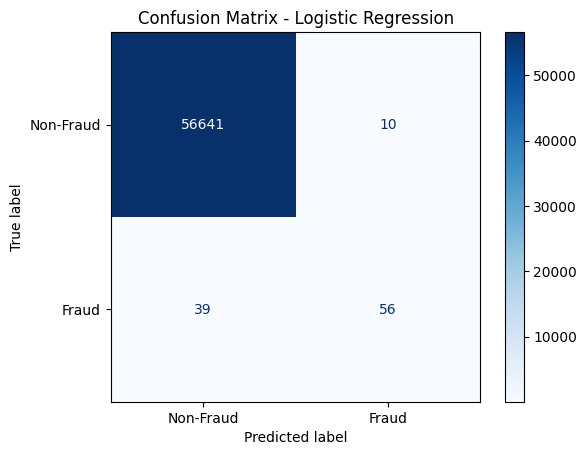

In [29]:
# Confusion Matrix Function
def plot_confusion(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

plot_confusion(lr, X_test, y_test, "Logistic Regression")

In [30]:
# Precision, Recall, F1 Score
print("Classification Report - Logistic Regression")
print(classification_report(y_test, lr.predict(X_test), digits=4))

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     56651
           1     0.8485    0.5895    0.6957        95

    accuracy                         0.9991     56746
   macro avg     0.9239    0.7946    0.8476     56746
weighted avg     0.9991    0.9991    0.9991     56746



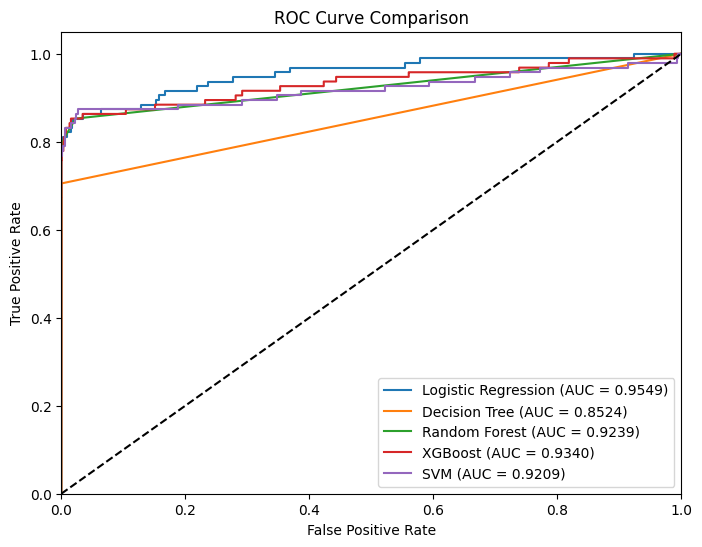

In [31]:
# ROC Curve & ROC-AUC Score
def plot_roc(models, X_test, y_test):
    plt.figure(figsize=(8,6))
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:,1]
        else:  # SVM
            y_prob = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
    
    plt.plot([0,1], [0,1], 'k--')  
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc='lower right')
    plt.show()

# Dictionary of trained models
models_dict = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "XGBoost": xgb,
    "SVM": svm
}

plot_roc(models_dict, X_test, y_test)

# **Step 5: Model Improvements**

## **1. Address Imbalanced Data**

### Two common approaches:

### **a) Oversampling using SMOTE**

### Generates synthetic fraud cases to balance the dataset

In [32]:
!pip install imbalanced-learn

In [33]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)  
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Original training set class distribution:\n", y_train.value_counts())
print("After SMOTE resampling:\n", y_train_res.value_counts())

Original training set class distribution:
 Class
0    226602
1       378
Name: count, dtype: int64
After SMOTE resampling:
 Class
0    226602
1    113301
Name: count, dtype: int64


### Fraud:Normal ratio ~ 1:2

### **b) Undersampling Majority Class**

### Reduces number of non-fraud samples to match frauds

In [34]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)  
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
print("After undersampling:\n", y_train_under.value_counts())

After undersampling:
 Class
0    378
1    378
Name: count, dtype: int64


### Equal classes

### **2. Decision Threshold Adjustment**

### Instead of default 0.5, adjust threshold to maximize recall (catch more frauds) or precision (avoid false alarms)

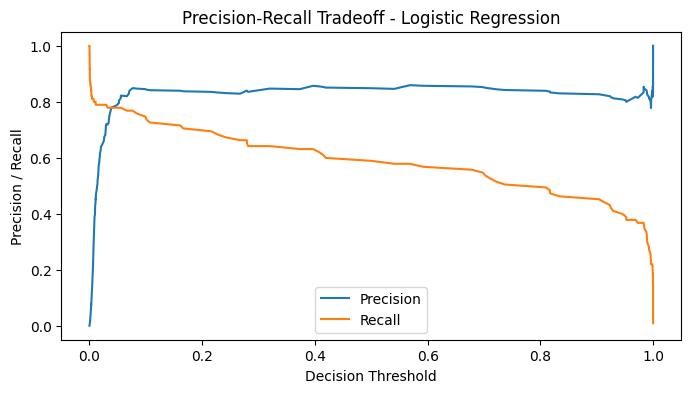

Adjusted Threshold Classification Report:
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56651
           1     0.8472    0.6421    0.7305        95

    accuracy                         0.9992     56746
   macro avg     0.9233    0.8210    0.8651     56746
weighted avg     0.9991    0.9992    0.9992     56746



In [35]:
from sklearn.metrics import precision_recall_curve

# Example: Logistic Regression
y_prob = lr.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(8,4))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Decision Threshold")
plt.ylabel("Precision / Recall")
plt.title("Precision-Recall Tradeoff - Logistic Regression")
plt.legend()
plt.show()

# Choose threshold that balances business needs
optimal_threshold = 0.3 
y_pred_adj = (y_prob >= optimal_threshold).astype(int)

from sklearn.metrics import classification_report
print("Adjusted Threshold Classification Report:")
print(classification_report(y_test, y_pred_adj, digits=4))

### **3. Re-train Models with Resampled Data**


In [36]:
# Logistic Regression with SMOTE
lr_smote = LogisticRegression(max_iter=1000, random_state=42)
lr_smote.fit(X_train_res, y_train_res)

# Evaluate
evaluate_model("Logistic Regression (SMOTE)", lr_smote, X_test, y_test)


===== Logistic Regression (SMOTE) =====
Confusion Matrix:
[[55961   690]
 [   12    83]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9878    0.9938     56651
           1     0.1074    0.8737    0.1912        95

    accuracy                         0.9876     56746
   macro avg     0.5536    0.9308    0.5925     56746
weighted avg     0.9983    0.9876    0.9924     56746

ROC-AUC Score: 0.9646


{'Model': 'Logistic Regression (SMOTE)',
 'Precision': 0.1073738680465718,
 'Recall': 0.8736842105263158,
 'F1-Score': 0.1912442396313364,
 'ROC-AUC': 0.964602752401825}

In [ ]:
# Logistic Regression with SMOTE
lr_smote = LogisticRegression(max_iter=1000, random_state=42)
lr_smote.fit(X_train_res, y_train_res)
evaluate_model("Logistic Regression (SMOTE)", lr_smote, X_test, y_test)

# Decision Tree with SMOTE
dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_train_res, y_train_res)
evaluate_model("Decision Tree (SMOTE)", dt_smote, X_test, y_test)

# Random Forest with SMOTE
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_res, y_train_res)
evaluate_model("Random Forest (SMOTE)", rf_smote, X_test, y_test)

# Support Vector Machine (SVM) with SMOTE
svm_smote = SVC(probability=True, random_state=42)
svm_smote.fit(X_train_res, y_train_res)
evaluate_model("SVM (SMOTE)", svm_smote, X_test, y_test)

# XGBoost with SMOTE
xgb_smote = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_smote.fit(X_train_res, y_train_res)
evaluate_model("XGBoost (SMOTE)", xgb_smote, X_test, y_test)



===== Logistic Regression (SMOTE) =====
Confusion Matrix:
[[55961   690]
 [   12    83]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9878    0.9938     56651
           1     0.1074    0.8737    0.1912        95

    accuracy                         0.9876     56746
   macro avg     0.5536    0.9308    0.5925     56746
weighted avg     0.9983    0.9876    0.9924     56746

ROC-AUC Score: 0.9646
